# Violin Plots: An Overview

Violin plots are a method of plotting numeric data and are similar to box plots, but with the addition of a rotated kernel density plot on each side. This allows them to show the distribution, density, and probability density of the data along with the summary statistics typically shown in a box plot.

<center><img src="https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png" height="400px"></center>

## Utility:
1. **Distribution Visualization**: Violin plots provide a detailed view of the data distribution, including multimodal distributions (i.e., distributions with multiple peaks).
2. **Density Estimation**: They show the density of the data at different values, giving insight into the frequency of data points.
3. **Comparative Analysis**: Violin plots can compare distributions across multiple groups or categories more comprehensively than box plots alone.
4. **Combination of Summary Statistics and Distribution**: They combine the benefits of box plots and density plots, displaying both summary statistics and the full distribution of the data.

## When to Use Violin Plots:
1. **Detailed Distribution Insight**: When you need to understand the distribution and density of the data in detail.
2. **Comparing Multiple Groups**: When comparing the distribution of multiple groups or categories.
3. **Multimodal Distributions**: When dealing with data that may have multiple peaks or modes.
4. **Exploratory Data Analysis**: For exploring the underlying distribution and variability in the data.

## Pitfalls of Using Violin Plots:
1. **Complexity**: Violin plots can be more complex and harder to interpret for audiences unfamiliar with them.
2. **Over-Smoothing**: Kernel density estimation can sometimes oversmooth the data, hiding important features.
3. **Misleading Density Representation**: The choice of bandwidth for the kernel density estimation can significantly affect the appearance and interpretation of the plot.
4. **Visual Clutter**: When comparing many groups, violin plots can become cluttered and difficult to read.
5. **Requires Larger Sample Sizes**: Violin plots are less effective with small sample sizes as the density estimation might be unreliable.

## Mitigation Strategies:
1. **Educate Audience**: Provide explanations or legends to help interpret the components of the violin plot, especially if the audience is unfamiliar with them.
2. **Adjust Bandwidth**: Experiment with different bandwidths for the kernel density estimation to find a balance between smoothness and detail. Use cross-validation methods to select an appropriate bandwidth.
3. **Simplify Comparison**: For comparing multiple groups, consider using faceting or small multiples to reduce clutter and enhance readability.
4. **Complementary Plots**: Use violin plots in conjunction with other plots (like box plots or histograms) to provide a more comprehensive understanding of the data.
5. **Highlight Key Data Points**: Use annotations or different colors to highlight key data points or differences between groups.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(data,index_col='data',parse_dates=True)
df.rename(columns={'temperatura-mininima':'temperatura-minima'},inplace=True)
df

,casos-confirmados,chuva,temperatura-media,temperatura-minima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9
...,...,...,...,...,...
2014-08-01,55,12.2,20.6,13.1,24.7
2014-09-01,40,69.2,23.0,18.6,26.8
2014-10-01,40,15.6,24.7,17.2,30.0


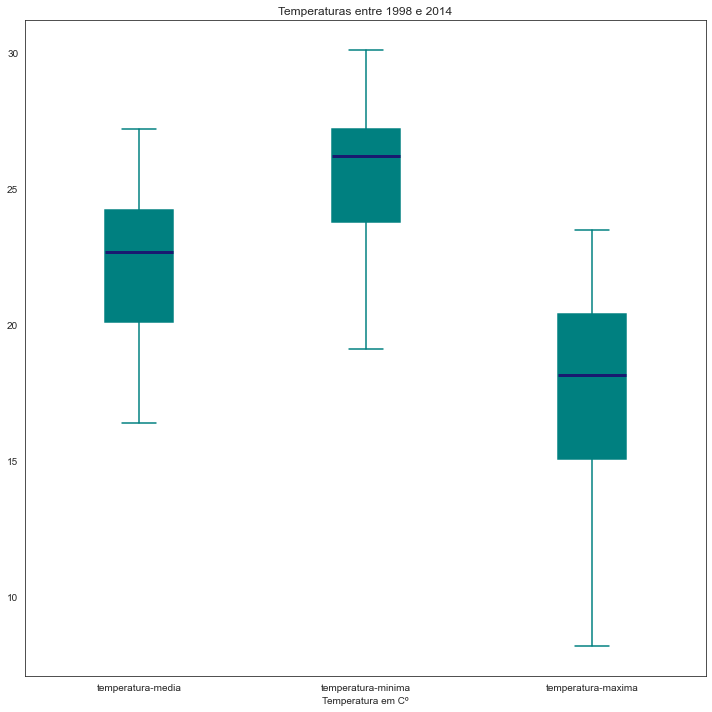

In [79]:
fig,ax = plt.subplots(figsize=(10,10),
                      dpi=72)

fig.set(tight_layout=True)

col_names = df.columns[[2,3,4]]

ax.boxplot((df['temperatura-media'],df['temperatura-maxima'],df['temperatura-minima']),
           vert=True,
           labels=col_names,
           patch_artist=True,
           boxprops={
               "facecolor":"teal",
               "color":"teal",
               "linewidth":1.5
           },
           medianprops={
               "color":"midnightblue",
               "linewidth":3 
           },
           whiskerprops={
               "color":"teal",
               "linewidth":1.5
           },
           capprops={
                "color":"teal",
               "linewidth":1.5
           }
           );

ax.set(title="Temperaturas entre 1998 e 2014",
       xlabel="Temperatura em Cº");

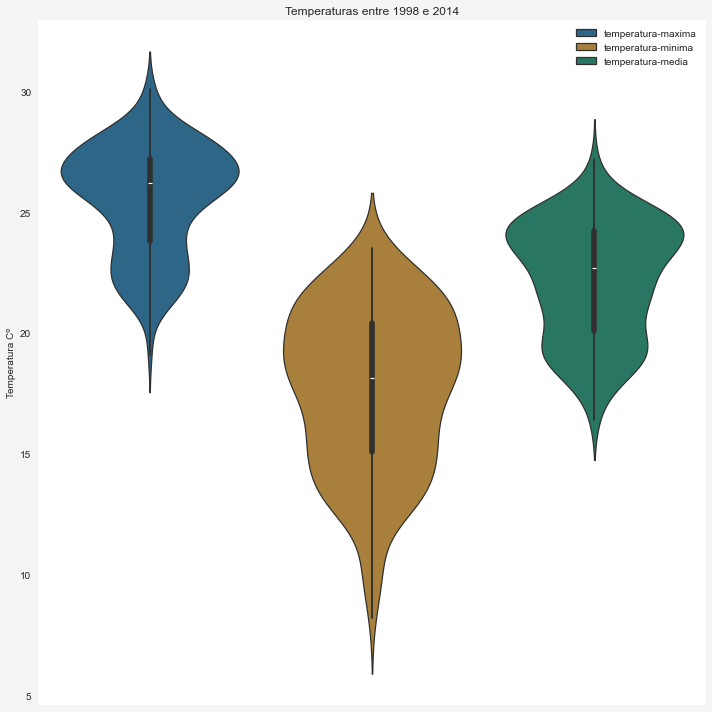

In [80]:
# setting seaborn theme (affects how the plot will look like in general)
sns.set_style('white')
sns.set_palette('colorblind')

# creating the figure and axes
fig1,ax1 = plt.subplots(figsize=(10,10),
                        dpi=72)

# setting figure attributes
fig1.set(tight_layout=True,
         facecolor='whitesmoke')

# creating the violin plot
sns.violinplot(data=df[['temperatura-maxima','temperatura-minima','temperatura-media']],
               saturation=0.5,
               legend="full",
               ax=ax1
               );

# setting axes attributes
ax1.set(title="Temperaturas entre 1998 e 2014",
        ylabel="Temperatura Cº"
        );

ax1.xaxis.set_visible(False)
ax1.spines[:].set_visible(False)

ax1.legend(loc='best',
           frameon=False);